In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dateset_1.csv')
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop("Item(s)", axis='columns', inplace=True)

In [4]:
df.shape[1] # Show dimension of thecolumns
df.shape[1] # Show range of the columns

df.columns = range(df.shape[1])   # Delete headers

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


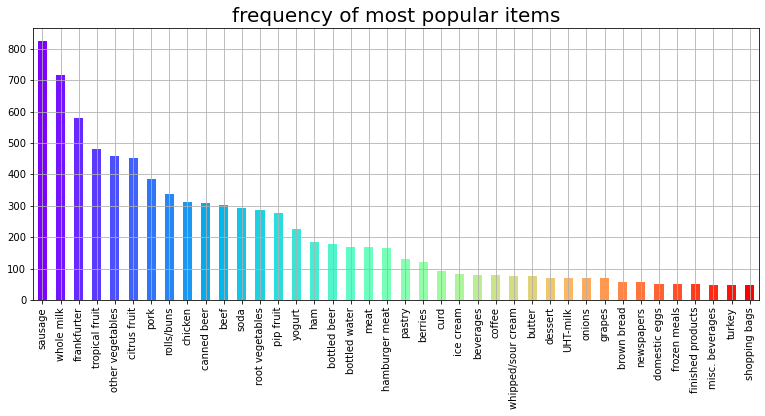

In [6]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [7]:
# pre process
x = df
x=x.replace('/',' ',regex=True).astype(str) # remove "/"

In [8]:
items = set()
for col in x:
    items.update(df[col].unique())
print(items)

len(items)

{nan, 'bags', 'potted plants', 'sugar', 'dog food', 'mayonnaise', 'finished products', 'dessert', 'canned fruit', 'vinegar', 'packaged fruit/vegetables', 'salty snack', 'frozen potato products', 'sparkling wine', 'ready soups', 'prosecco', 'butter milk', 'flour', 'onions', 'semi-finished bread', 'potato products', 'fish', 'roll products', 'abrasive cleaner', 'cake bar', 'rubbing alcohol', 'spices', 'mustard', 'bottled beer', 'soft cheese', 'whipped/sour cream', 'cookware', 'zwieback', 'cat food', 'ham', 'specialty bar', 'canned fish', 'processed cheese', 'sausage', 'turkey', 'frozen vegetables', 'chocolate marshmallow', 'UHT-milk', 'soda', 'organic sausage', 'popcorn', 'liquor', 'Instant food products', 'bathroom cleaner', 'rum', 'tropical fruit', 'baby cosmetics', 'frozen dessert', 'specialty vegetables', 'sweet spreads', 'tidbits', 'meat', 'chocolate', 'ketchup', 'seasonal products', 'nut snack', 'kitchen towels', 'meat spreads', 'long life bakery product', 'soap', 'baking powder', '

170

In [9]:
itemset = set(items)

encoded_vals = []

for index, row in x.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_x = pd.DataFrame(encoded_vals)
ohe_x

,NaN,bags,potted plants,sugar,dog food,mayonnaise,finished products,dessert,canned fruit,vinegar,...,organic products,canned vegetables,condensed milk,house keeping products,pasta,liqueur,margarine,ready soups,citrus fruit,semi-finished bread
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
# # remove 'nan' coloumn
# y = ohe_x.drop(['nan'], axis=1)
# y

In [10]:
freq_items = apriori(ohe_x, min_support=0.01, use_colnames=True, verbose=1)
freq_items

Processing 252 combinations | Sampling itemset size 43


,support,itemsets
0,0.017285,(potted plants)
1,0.033859,(sugar)
2,0.037112,(dessert)
3,0.037824,(salty snack)
4,0.027961,(butter milk)
...,...,...
264,0.010574,"(other vegetables, whole milk, pastry)"
265,0.023183,"(other vegetables, whole milk, root vegetables)"
266,0.013523,"(other vegetables, whole milk, pip fruit)"
267,0.013015,"(other vegetables, whole milk, citrus fruit)"


In [11]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(sugar),(whole milk),0.033859,0.255516,0.015048,0.444444,1.739400,0.006397,1.340071
1,(sugar),(other vegetables),0.033859,0.193493,0.010778,0.318318,1.645119,0.004226,1.183114
2,(dessert),(whole milk),0.037112,0.255516,0.013726,0.369863,1.447514,0.004244,1.181464
3,(dessert),(other vegetables),0.037112,0.193493,0.011591,0.312329,1.614164,0.004410,1.172810
4,(salty snack),(whole milk),0.037824,0.255516,0.011185,0.295699,1.157262,0.001520,1.057054
...,...,...,...,...,...,...,...,...,...
170,"(other vegetables, citrus fruit)",(whole milk),0.028876,0.255516,0.013015,0.450704,1.763898,0.005636,1.355343
171,"(whole milk, citrus fruit)",(other vegetables),0.030503,0.193493,0.013015,0.426667,2.205080,0.007113,1.406699
172,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
173,"(other vegetables, root vegetables)",(citrus fruit),0.047382,0.082766,0.010371,0.218884,2.644626,0.006450,1.174262


In [12]:
antecedents_1 = rules["antecedents"].tolist()

In [13]:
antecedents_2=[list(x) for x in antecedents_1]


antecedents = [' AND '.join(ele) for ele in antecedents_2]
  
print(str(antecedents))

['sugar', 'sugar', 'dessert', 'dessert', 'salty snack', 'salty snack', 'butter milk', 'butter milk', 'onions', 'onions', 'bottled beer', 'bottled beer', 'bottled beer', 'ham', 'sausage', 'sausage', 'sausage', 'sausage', 'frozen vegetables', 'frozen vegetables', 'frozen vegetables', 'frozen vegetables', 'chocolate', 'pork', 'soda', 'shopping bags', 'white bread', 'bottled water', 'pastry', 'napkins', 'yogurt', 'tropical fruit', 'tropical fruit', 'tropical fruit', 'tropical fruit', 'pip fruit', 'citrus fruit', 'chocolate', 'chocolate', 'long life bakery product', 'long life bakery product', 'beef', 'beef', 'beef', 'beef', 'chicken', 'chicken', 'chicken', 'brown bread', 'brown bread', 'brown bread', 'butter', 'butter', 'butter', 'butter', 'cream cheese', 'cream cheese', 'cream cheese', 'hard cheese', 'whole milk', 'yogurt', 'domestic eggs', 'curd', 'bottled water', 'berries', 'other vegetables', 'yogurt', 'napkins', 'root vegetables', 'pip fruit', 'margarine', 'citrus fruit', 'oil', 'hamb

In [14]:
consequents_1 = rules["consequents"].tolist()

In [15]:
consequents_2=[list(x) for x in consequents_1]

consequents = [' AND '.join(ele) for ele in consequents_2]

print(str(consequents))

['whole milk', 'other vegetables', 'whole milk', 'other vegetables', 'whole milk', 'other vegetables', 'whole milk', 'other vegetables', 'whole milk', 'other vegetables', 'soda', 'whole milk', 'other vegetables', 'whole milk', 'soda', 'yogurt', 'whole milk', 'other vegetables', 'yogurt', 'whole milk', 'other vegetables', 'root vegetables', 'soda', 'soda', 'whole milk', 'soda', 'soda', 'soda', 'soda', 'soda', 'tropical fruit', 'yogurt', 'whole milk', 'other vegetables', 'root vegetables', 'tropical fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'whole milk', 'other vegetables', 'yogurt', 'whole milk', 'other vegetables', 'root vegetables', 'whole milk', 'other vegetables', 'root vegetables', 'yogurt', 'whole milk', 'other vegetables', 'yogurt', 'whole milk', 'other vegetables', 'root vegetables', 'yogurt', 'whole milk', 'other vegetables', 'whole milk', 'yogurt', 'whole milk', 'yogurt', 'yogurt', 'yogurt', 'yogurt', 'yogurt', 'other vegetables', 'yogurt', 'yogurt', 'yogurt'

In [16]:
new_table = pd.DataFrame(
    {'antecedents': antecedents,
     'consequents': consequents,
    })

new_table

,antecedents,consequents
0,sugar,whole milk
1,sugar,other vegetables
2,dessert,whole milk
3,dessert,other vegetables
4,salty snack,whole milk
...,...,...
170,other vegetables AND citrus fruit,whole milk
171,whole milk AND citrus fruit,other vegetables
172,other vegetables AND citrus fruit,root vegetables
173,other vegetables AND root vegetables,citrus fruit


In [17]:
d = new_table.groupby('antecedents')['consequents'].agg(list).to_dict()
d

{'beef': ['yogurt', 'whole milk', 'other vegetables', 'root vegetables'],
 'berries': ['yogurt', 'whole milk', 'other vegetables'],
 'bottled beer': ['soda', 'whole milk', 'other vegetables'],
 'bottled water': ['soda', 'yogurt', 'whole milk', 'other vegetables'],
 'brown bread': ['yogurt', 'whole milk', 'other vegetables'],
 'butter': ['yogurt',
  'whole milk',
  'other vegetables',
  'root vegetables',
  'other vegetables AND whole milk'],
 'butter milk': ['whole milk', 'other vegetables'],
 'chicken': ['whole milk', 'other vegetables', 'root vegetables'],
 'chocolate': ['soda', 'whole milk', 'other vegetables'],
 'citrus fruit': ['tropical fruit',
  'yogurt',
  'whole milk',
  'other vegetables',
  'root vegetables'],
 'citrus fruit AND root vegetables': ['other vegetables'],
 'citrus fruit AND yogurt': ['whole milk'],
 'coffee': ['whole milk', 'other vegetables'],
 'cream cheese': ['yogurt', 'whole milk', 'other vegetables'],
 'curd': ['yogurt', 'whole milk', 'other vegetables', 'r

In [62]:
# search_item = input("Item")

# for d_key in d.keys():
#         if d_key == search_item:
            
#             item = d[d_key]
#             print("People also viewed these items : ")
#             print(item)
#             break
# else:
#      print("People also viewed these items:NONE\n")

In [18]:
def finder(key):
    search_item = key

    for d_key in d.keys():
        if d_key == search_item:
            print("People also viewed these items :")
            item = d[d_key]
            print(item)
            break
    else:
        print("People also viewed these items:NONE\n")

In [19]:
finder('root vegetables AND citrus fruit')

People also viewed these items:NONE



In [67]:
_RULES_PATH_PKL = 'associationRules.pkl'
rules.to_pickle(_RULES_PATH_PKL, protocol=4)

In [68]:
import pickle

In [69]:
file = open('associationRules.pkl')

In [74]:
objects = []
with (open("associationRules.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [75]:
model = open('associationRules.pkl','rb')
reading = pickle.load(model)

In [76]:
print(reading)

                    antecedents         consequents  antecedent support  \
0                   (pip fruit)   (root vegetables)            0.075648   
1                   (pip fruit)  (other vegetables)            0.075648   
2                   (pip fruit)    (tropical fruit)            0.075648   
3                   (pip fruit)        (whole milk)            0.075648   
4                   (pip fruit)            (yogurt)            0.075648   
..                          ...                 ...                 ...   
170        (yogurt, whole milk)    (tropical fruit)            0.056024   
171              (soda, yogurt)        (whole milk)            0.027351   
172          (soda, whole milk)            (yogurt)            0.040061   
173      (yogurt, citrus fruit)        (whole milk)            0.021657   
174  (citrus fruit, whole milk)            (yogurt)            0.030503   

     consequent support   support  confidence      lift  leverage  conviction  
0              0.10